In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

import utils
%matplotlib inline

In [2]:
DATA_DIR = utils.get_data_dir()

patients = os.listdir(DATA_DIR + 'sample_images/')
labels_df = pd.read_csv(DATA_DIR + 'stage1_labels.csv')

labeled_patients = list(set(patients) & set(labels_df["id"]))
labels_df = labels_df[labels_df['id'].isin(patients)]

In [26]:
import preprocessing
reload(preprocessing)
from multiprocessing import Pool

In [10]:
%%time
# labeled_sample_patients = \
#     map(lambda patient : DATA_DIR + "sample_images/" + patient, labeled_patients)
labeled_sample_patients = map(lambda patient: 'data/stage1/' + patient, 
                          ['245fe0c86269602b0dab44c345b0b412',
                           '35b9a3e9871499893f76c8e6c648562c',
                           '3457880b1a66030feb8adaed6da805af',
                           '0c60f4b87afcb3e2dfa65abbbf3ef2f9'])
# preprocess all of the patients
p = Pool(utils.get_cpu_cores())
sample_images3D = p.map(preprocessing.preprocess, labeled_sample_patients)

CPU times: user 25.8 s, sys: 2.7 s, total: 28.5 s
Wall time: 29.9 s


# Compare Very Large Scan To Small Scan
- 7th scan (30, 42, 42)
- 10th scan (35, 26, 26)

In [34]:
import preprocessing
reload(preprocessing)
cropped_images = preprocessing.crop(sample_images3D)

In [17]:
for cropped_image in cropped_images:
    print cropped_image.shape

(56, 65, 65)
(56, 65, 65)
(56, 65, 65)
(56, 65, 65)


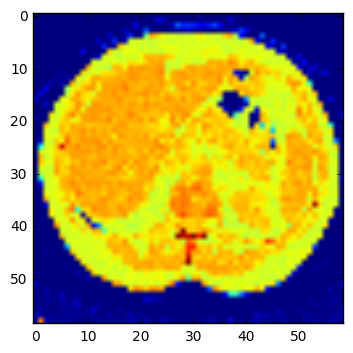

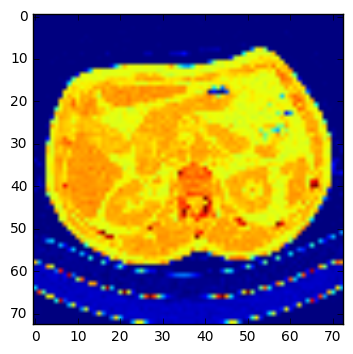

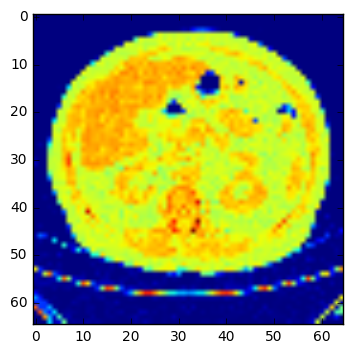

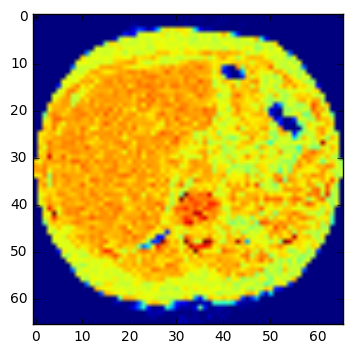

In [18]:
# what does the 'first' scan look like for all of the patients
for cropped_image in sample_images3D:
    plt.figure()
    plt.imshow(cropped_image[0])

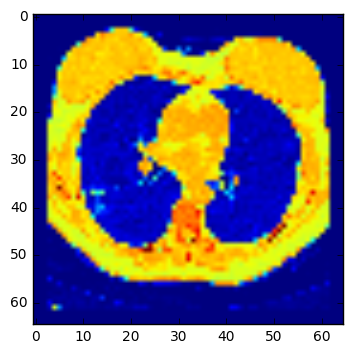

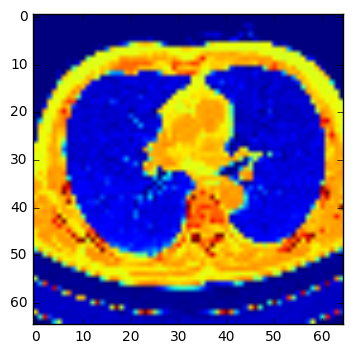

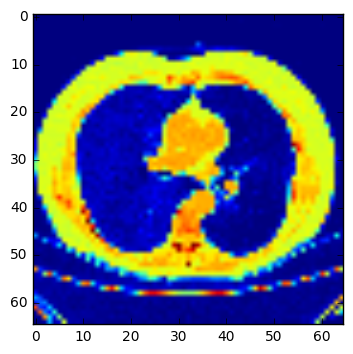

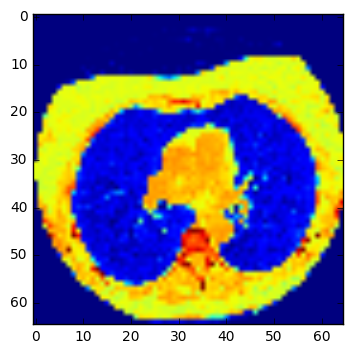

In [19]:
# what does the 'middle' scan look like for all of the patients
for cropped_image in cropped_images:
    plt.figure()
    plt.imshow(cropped_image[len(cropped_image)/2])

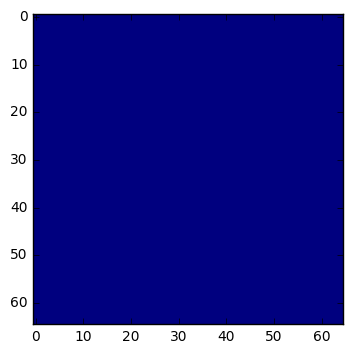

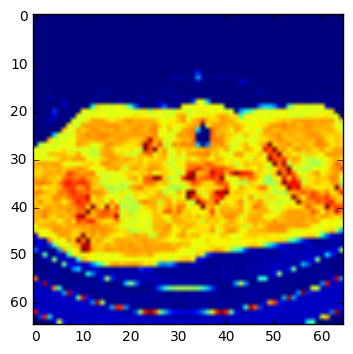

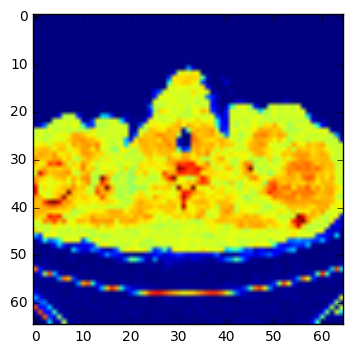

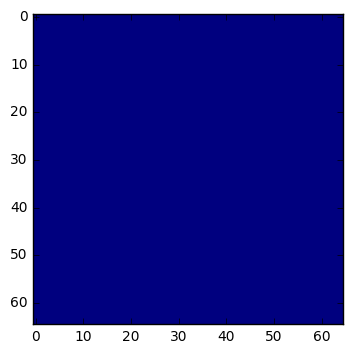

In [20]:
# what does the 'last' scan look like for all of the patients
for cropped_image in cropped_images:
    plt.figure()
    plt.imshow(cropped_image[-1])

In [36]:
import preprocess_stage1
reload(preprocess_stage1)
from preprocess_stage1 import preprocess_stage1
preprocess_stage1()

In [38]:
from preprocessing import get_preprocessed_patient
patients_files = os.listdir(DATA_DIR + 'stage1-preprocessed/')
patients_files = [DATA_DIR + 'stage1-preprocessed/' + patients_file for patients_file in patients_files]
p = Pool(utils.get_cpu_cores())
sample_images3D = p.map(get_preprocessed_patient, patients_files)

In [39]:
sample_images3D

[array([[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         ..., 
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]],
 
        [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         ..., 
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]],
 
        [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         ..., 
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]],
 
        ..., 
        [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0